# Lab 2: Numerical solutions of ODEs

In this Lab we will work with the implementations of numerical schemes you learned in week 3, and use these to solve problems from Chapter 8 of Boyce & DiPrima.

## 1. The numerical schemes

Several ODE solvers are implemented in the script below:

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


# Euler scheme
def ode_Euler(func, times, y0):
    '''
    integrates the system of y' = func(y, t) using forward Euler method
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    # guess why I put these two lines here?
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y

# Heun scheme
def ode_Heun(func, times, y0):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    for k in range(nT-1):
        dt = times[k+1] - times[k]
        f1 = func(y[k,:], times[k])
        f2 = func(y[k,:] + (times[k+1]-times[k])*f1, times[k+1])
        y[k+1, :] = y[k, :] + 0.5*(times[k+1]-times[k])*(f1+f2)
    return y


# Adams-Bashforth 2 (here needing a fixed timestep)
def ode_AB2(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt
       
    return y, times 

<div class="alert alert-info">
    <h3>Exercise 1.1 <span style="font-size: 75%; font-weight: normal;"></span></h3>
    

**(a)** What's the point of line 22 and 23 (`times = np.array(times)` and `y0 = np.array(y0)`)?

**(b)** Try to use proper comments and docstrings for all other functions in a similar way I have done it for `ode_Euler`. What is the difference between docstring and regular comments? Why is it important to use it for frequently used functions like ODE solvers? 

**(c)** Why the range is set to `range(nT-1)`?
    
**(d)** Is it necessary for the vetor `times` to consist of equally distanced points? 
     
**(e)** In AdamsBashforth2, why `+1` in `t = np.linspace(initialTime, finalTime, nSteps+1)`?

</div>

**Answers**

**(a)** The user may enter the times or initial conditions as numpy array or lists or even single float/integer variables. This automatically 'typecasts' (google the term if you do not know what it is) the input to numpy array. As a result, even if the user puts something other than numpy arrays, we can treat them as numpy arrays. This beocmes important when we use `.size` method to find the dimension of system or time steps. 

**(b)** You can find a commented version below. Docstrings are like user manuals for functions, methods or packages in Python. In addition to helping us avoid `#` for every single line in a block of comments, we can see what a function is about for example by using `help` command. Check the line below.

**(c)** You can reason this one yourself!

**(d)** No. Any sets of points work for Euler and Heun's method as long as they are chronologically ordered.

**(e)** This is because to get say 10 equal time steps, we need 11 points: the start time, the 9 in-between times, and the end time.

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### BEGIN SOLUTION

# Euler scheme
def ode_Euler(func, times, y0):
    '''
    integrates the system of y' = func(y, t) using forward Euler method
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    # guess why I put these two lines here?
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y

# Heun scheme
def ode_Heun(func, times, y0):
    '''
    integrates the system of y' = func(y, t) using Heun's method
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # time loop    
    for k in range(nT-1):
        dt = times[k+1] - times[k]
        f1 = func(y[k,:], times[k])
        f2 = func(y[k,:] + (times[k+1]-times[k])*f1, times[k+1])
        y[k+1, :] = y[k, :] + 0.5*(times[k+1]-times[k])*(f1+f2)
    return y


# Adams-Bashforth 2 (here needing a fixed timestep)
def ode_AB2(func, initialTime, finalTime, nSteps, y0):
    """integrates the system of y' = func(y, t) using Adams-Bashforth 2nd order
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        initialTime: the starting point for time integration for which initial condition is given
        finalTime: the end time integration intervals
        nSteps: number of steps between "initialTime" and "finalTime"
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
        times: a numpy array consisting of all times at which the solution is given
    """
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt
        
    return y, times 

### END SOLUTION

---------------


Boyce & DiPrima Chapter 8 uses the equation $$y'=1-t+4y, \\y(0)=1$$ throughout to illustrate these different numerical methods. 

Here we define a function `eq7_dy_dt` that gives the value of the derivative $y'$ at a given point, then use the `Euler` method to solve the equation numerically with step size $h=0.01$:

In [3]:
def eq7_dy_dt(y, t):
    return 1 - t + 4*y

times = np.linspace(0,2,201)
eq7_euler = ode_Euler(eq7_dy_dt, times, 1)

<span class="label label-danger">Task</span>
Why is it `np.linspace(0,2,201)` and not `np.linspace(0,2,200)`? Try changing the code and see what happens.

We can check that the final value this gives (corresponding to $t=2$) agrees with the value $3029.3279$ given in Table 8.1.1 in the book:
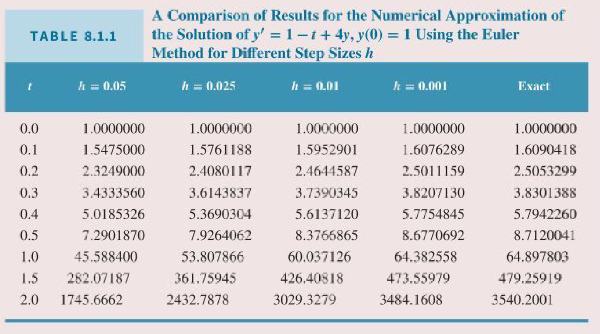

In [4]:
print(eq7_euler[-1])

[3029.32787693]


And we can obtain the numerical value itself by converting to a float:

In [5]:
float(eq7_euler[-1])

3029.3278769261874

In fact, by creating a `DataFrame` object using the [Pandas package](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), we can see the whole table of values:

In [6]:
from pandas import DataFrame
DataFrame(data = eq7_euler, index = times, columns = ["h=0.01"])

,h=0.01
0.00,1.000000
0.01,1.050000
0.02,1.101900
0.03,1.155776
0.04,1.211707
...,...
1.96,2589.517539
1.97,2693.088640
1.98,2800.802486
1.99,2912.824786


<div class="alert alert-info">
    <h3>Exercise 1.2</h3>

**(a)** Write code to check the final value for $h=0.001$ is $3484.1608$.

**(b)** Check that applying the Heun method with $h=0.01$ gives $3532.8789$ when $t=2$, as in Table 8.2.1 of the book.
    
**(c)** Continuing from (b), what is the result of the Heun method for $t=2$, with $h=0.001$? <span class="label label-success"></span>

</div>

In [7]:
# Your code here for (a)

### BEGIN SOLUTION
values = ode_Euler(eq7_dy_dt, np.linspace(0,2,2001), 1)
print("(a) "+str(values[-1]))
### END SOLUTION

(a) [3484.16080308]


In [8]:
# Your code here for (b)

### BEGIN SOLUTION
values = ode_Heun(eq7_dy_dt, np.linspace(0,2,201), 1)
print("(b) "+str(values[-1]))
### END SOLUTION

(b) [3532.87886075]


In [9]:
# Your code here for (c)
# Store the numerical result as a float, using the variable name heun_001

### BEGIN SOLUTION
values = ode_Heun(eq7_dy_dt, np.linspace(0,2,2001), 1)
print("(c) "+str(values[-1]))
heun_001 = float(values[-1])
print(heun_001)
### END SOLUTION

(c) [3540.124819]
3540.124819000728


In [10]:
assert type(heun_001) == float
print("Success! Value is a float")
assert np.abs(heun_001 - 3540) < 1
print("Success! Value is close to the correct numerical value")
# Hidden test will check for the exact value:
### BEGIN HIDDEN TESTS
assert np.abs(heun_001 - 3540.124819000728) < 10e-7
print("Success! Value agrees to 7 d.p.")
### END HIDDEN TESTS

Success! Value is a float
Success! Value is close to the correct numerical value
Success! Value agrees to 7 d.p.


## Runge-Kutta Method

Now that you have seen how a few ODE sovling methods coded and used, you can try to write a code yourself for the popular method of Runge-Kutta. You can find this method in chapter 8.3 of Boyce & DiPrima or simply on [wikipedia page](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

<span class="label label-danger">Task</span>
In the cell below write a function similar to `ode_Euler` at the beginning of this notebook that uses fourth Runge-Kutta scheme to solve a given ODE. 

In [11]:
# Runge-Kutta 4 scheme

### BEGIN SOLUTION

def ode_RK4(func,times,y0):
    '''
    integrates the system of y' = func(y, t) using Runge-Kutta 4th order
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    for k in range(nT-1):
        dt = times[k+1] - times[k]
        f1 = func(y[k,:], times[k])
        f2 = func(y[k,:] + 0.5*dt*f1, times[k] + 0.5*dt)
        f3 = func(y[k,:] + 0.5*dt*f2, times[k] + 0.5*dt)
        f4 = func(y[k,:] + dt*f3, times[k] + dt)
        y[k+1,:] = y[k,:]+dt/6*(f1+2*f2+2*f3+f4)
    return y 

### END SOLUTION

Check you code for 201 steps from 0 to 2. The answer should be 3540.1995.

In [12]:
times = np.linspace(0,2,201)
eq7_RK4 = ode_RK4(eq7_dy_dt, times, 1)
print(eq7_RK4[-1])

[3540.19952527]


## 2. Standardising the arguments

Notice that the some of our methods (`ode_Euler`, `ode_Heun` and `ode_RK4`) have the same pattern of arguments, but the fourth method (`ode_AB2`) is different. Furthermore, none of the four methods accepts a step size (e.g. $h=0.05$), which is the parameter that we would like to vary.

In this section, we try to create new versions of the functions which take initial and final time with the step size. 

The first step is to create a new function that will create the `times` needed in the first three methods.

Here is a basic implementation of a `timesteps` function, which generates an array of numbers starting at the value `start` and increasing with step size `h` until the value `stop` is reached.

In [13]:
import math
def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

timesteps(0, 0.5, h = 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

<span class="label label-danger">Task</span>
Check that this function does indeed work as expected, by trying it out with different inputs. Think about different tricky cases which might break the code, and try those!

<div class="alert alert-info">
    <h3>Exercise 2.1 <span class="label label-success" style="font-size: 60%">2 marks</span></h3>

Produce new functions `Euler_step`, `Heun_step`, `RK4_step` and `AB2_step`, which use the four functions in the previous section to solve a given equation numerically. Each of the new functions should take in the arguments:

* `func` - a function defining the differential equation
* `start` - the initial time
* `stop` - the end time
* `h` - the step size
* `ics` - the intial conditions

and return both the values of the numerical solution and the list of time steps (like in the `ode_AB2` function).

</div>

Note - you should **not** copy and modify the original functions given above. Instead, you should call those functions from within your own ones, having worked out the appropriate values to pass to them.

In [14]:
# Your code here

### BEGIN SOLUTION
def Euler_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    values = ode_Euler(func, times, ics)
    return values, times

def Heun_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    values = ode_Heun(func, times, ics)
    return values, times

def RK4_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    values = ode_RK4(func, times, ics)
    return values, times

def AB2_step(func, start, stop, h, ics):
    nSteps = math.ceil((stop - start)/h)
    values, times = ode_AB2(func, start, stop, nSteps, ics)
    return values, times
### END SOLUTION

In [15]:
# Autograder tests

function_names = ["Euler_step", "Heun_step", "RK4_step", "AB2_step"]

from inspect import signature
print("Checking for the correct number of arguments:")
for function_name in function_names:
    function_signature = signature(eval(function_name))
    assert len(function_signature.parameters) == 5
    print(" ✔ " + function_name)
    
print("\nChecking for the correct outputs for eq7:")
expected_values = [3029.32787693, 3532.87886075, 3540.19952527, 3519.13759054]
for function_name, expected_value in zip(function_names, expected_values):  
    obtained_values, obtained_times = eval(function_name)(eq7_dy_dt, 0, 2, h = 0.01, ics = 1)
    if (np.abs(float(obtained_values[-1]) - expected_value) < 10e-5):
        print(" ✔ " + function_name)
    else:
        print(" ✘ " + function_name)
        assert(np.abs(float(obtained_values[-1]) - expected_value) < 10e-5)

print("\nHidden checks of the output for another equation - 0.5 marks per function:")
### BEGIN HIDDEN TESTS
def eqTest_dy_dt(y, t):
    return 3*y - 4*t

expected_values = [12.454795544920149, 12.93150072331584, 12.936409181385683, 12.919233099111468]

def check_function(function_name, expected_value):
    obtained_values, obtained_times = eval(function_name)(eqTest_dy_dt, 0, 1, h = 0.01, ics = 1)
    return (np.abs(float(obtained_values[-1]) - expected_value) < 10e-5)
### END HIDDEN TESTS

Checking for the correct number of arguments:
 ✔ Euler_step
 ✔ Heun_step
 ✔ RK4_step
 ✔ AB2_step

Checking for the correct outputs for eq7:
 ✔ Euler_step
 ✔ Heun_step
 ✔ RK4_step
 ✔ AB2_step

Hidden checks of the output for another equation - 0.5 marks per function:


In [16]:
# Hidden test for Euler_step
### BEGIN HIDDEN TESTS
assert(check_function("Euler_step", 12.454795544920149) == True)
### END HIDDEN TESTS

In [17]:
# Hidden test for Heun_step
### BEGIN HIDDEN TESTS
assert(check_function("Heun_step", 12.93150072331584) == True)
### END HIDDEN TESTS

In [18]:
# Hidden test for RungeKutta_step
### BEGIN HIDDEN TESTS
assert(check_function("RK4_step", 12.936409181385683) == True)
### END HIDDEN TESTS

In [19]:
# Hidden test for AdamsBashforth2_step
### BEGIN HIDDEN TESTS
assert(check_function("AB2_step", 12.919233099111468) == True)
### END HIDDEN TESTS

## 3. Building tables

Now that we have these four functions with consistent arguments, we can easily replicate all the tables in Boyce & DiPrima, and solve further exercises.

For instance, we can produce one column of Table 8.1.1 with the following code:

In [21]:
eq7_E_values, eq7_E_times = Euler_step(eq7_dy_dt, 0, 2, h = 0.01, ics = 1)
DataFrame(data = eq7_E_values, index = eq7_E_times, columns = ["h = 0.01"])

,h = 0.01
0.00,1.000000
0.01,1.050000
0.02,1.101900
0.03,1.155776
0.04,1.211707
...,...
1.96,2589.517539
1.97,2693.088640
1.98,2800.802486
1.99,2912.824786


### Detour: list comprehensions and joining DataFrames

It would be possible at this point to copy/paste the above code, and make small changes to get other columns of the table. However, we can be a bit more efficient than that by making use of **list comprehensions**.

These are very similar to the standard mathematical notation for sets, e.g. $$\left\{x^2\,:\,x\in\{1,2,3\}\right\} = \{1^2, 2^2, 3^2\}$$ could be written in Python as:

In [22]:
[x ** 2 for x in [1,2,3]]

[1, 4, 9]

Here we use a list comprehension to produce a DataFrame where the column of values is given by a certain power of the row index:

In [23]:
def x_to_power(n):
    return DataFrame(data = [x ** n for x in range(5)], columns = ["x^"+str(n)])

x_to_power(2)

,x^2
0,0
1,1
2,4
3,9
4,16


<span class="label label-danger">Task</span>
Try changing `range(5)` in the definition of `x_to_power` so that the squares of 1 to 10 are printed instead.

We can use list comprehensions to produce many such DataFrames, each one with a different power:

In [24]:
dfs = [x_to_power(n) for n in [2,3,4]]
dfs[0] # try changing 0 to see the other DataFrames

,x^2
0,0
1,1
2,4
3,9
4,16


To put these columns into a single DataFrame, we can use the `join` function:

In [25]:
dfs[0].join(dfs[1])

,x^2,x^3
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64


In fact, it can be used to join multiple DataFrames at the same time:

In [26]:
dfs[0].join(dfs[1:])

,x^2,x^3,x^4
0,0,0,0
1,1,1,1
2,4,8,16
3,9,27,81
4,16,64,256


Putting that all together, here we build up a table in one chunk:

In [27]:
dfs2 = [x_to_power(n) for n in [0.5, 2, 3, 4]]
dfs2[0].join(dfs2[1:])

,x^0.5,x^2,x^3,x^4
0,0.000000,0,0,0
1,1.000000,1,1,1
2,1.414214,4,8,16
3,1.732051,9,27,81
4,2.000000,16,64,256


Note that we can also use the `filter` function to pick out certain rows from the DataFrame - we use the `items` argument to specify the values of the row index, and `axis=0` to specify that it's rows rather than columns that we are selecting:

In [28]:
big_df = dfs2[0].join(dfs2[1:])
big_df.filter(items=[2, 4], axis=0)

,x^0.5,x^2,x^3,x^4
2,1.414214,4,8,16
4,2.000000,16,64,256


<div class="alert alert-info">
    <h3>Exercise 3.1</h3>

**(a)** Write a `produce_df` function that takes in a `method` (which will be a function, like `Euler_step`) and all the arguments from Exercise 2.1, and returns a DataFrame showing the result of applying that method with the given data. In particular, `produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)` should produce the same table that we saw just before the Detour.

**(b)** Use the `produce_df` function, and the joining technique outlined above, to replicate Table 8.1.1 from Boyce & DiPrima (Note you don't need the final column with the *Exact* values). Please store your final table in a variable called `table_811`. <span class="label label-success">1 mark</span>

</div>

In [29]:
# Your code here for (a)

### BEGIN SOLUTION
def produce_df(method, vectorField, start, stop, h, ics):
    values, times = method(vectorField, start, stop, h, ics)
    return DataFrame(data = values, index = times, columns = ["h="+str(h)])

produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)
### END SOLUTION

,h=0.01
0.00,1.000000
0.01,1.050000
0.02,1.101900
0.03,1.155776
0.04,1.211707
...,...
1.96,2589.517539
1.97,2693.088640
1.98,2800.802486
1.99,2912.824786


In [30]:
# Autograder Test
ans_df = produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)
assert ans_df.shape[0] == 201
print("Success: Your table has the correct number of rows")
assert ans_df.shape[1] == 1
print("Success: Your table has the correct number of columns")
assert ans_df.columns[0] == 'h=0.01'
print("Success: Your table has the correct column name")

### BEGIN HIDDEN TESTS
orig_df = DataFrame(data = eq7_E_values, index = eq7_E_times, columns = ["h=0.01"])
ans_df = produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)
from pandas import testing
testing.assert_frame_equal(orig_df, ans_df)
### END HIDDEN TESTS

Success: Your table has the correct number of rows
Success: Your table has the correct number of columns
Success: Your table has the correct column name


In [34]:
# Your code here for (b)

### BEGIN SOLUTION
dfs = [produce_df(Euler_step, eq7_dy_dt, 0, 2, h, 1) for h in [0.05, 0.025, 0.01, 0.001]]
table_811_full = dfs[0].join(dfs[1:])
table_811 = table_811_full.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0], axis=0)
display(table_811)
### END SOLUTION

,h=0.05,h=0.025,h=0.01,h=0.001
0.0,1.000000,1.000000,1.000000,1.000000
0.1,1.547500,1.576119,1.595290,1.607629
0.2,2.324900,2.408012,2.464459,2.501116
0.4,5.018533,5.369030,5.613712,5.775484
0.5,7.290187,7.926406,8.376686,8.677069
1.0,45.588400,53.807866,60.037126,64.382558
1.5,282.071873,361.759447,426.408176,473.559790
2.0,1745.666237,2432.787755,3029.327877,3484.160803


In [ ]:
# Autograder Test

assert list(table_811.columns) == ['h=0.05', 'h=0.025', 'h=0.01', 'h=0.001']
print("Success: Your table has the correct columns.")

assert table_811.filter(items=[2.0], axis=0).iloc[0]["h=0.01"] == 3029.3278769261874
print("Success: The h=0.01, t=2.0 entry is correct.")

# Hidden test of some other entries:
### BEGIN HIDDEN TESTS
assert table_811.filter(items=[0.2], axis=0).iloc[0]["h=0.001"] == 2.501115930243626
assert table_811.filter(items=[1.0], axis=0).iloc[0]["h=0.05"] == 45.58839991031376
print(" ✔ checks of some other entries passed.")
### END HIDDEN TESTS

We can also easily plot the different columns of a DataFrame using the `matplotlib.pyplot` library that we used at the end of Lab 1:

In [ ]:
import matplotlib.pyplot as plt
big_df.plot()

<div class="alert alert-info">
    <h3>Exercise 3.2</h3>

Using the DataFrame constructed in the previous exercise, produce a plot of the different solutions from Table 8.1.1

</div>

In [ ]:
# remember to use the full version of Table 8.1.1 
# i.e. the table that has more than 8 rows

### BEGIN SOLUTION
dfs = [produce_df(Euler_step, eq7_dy_dt, 0, 2, h, 1) for h in [0.05, 0.025, 0.01, 0.001]]
table_811_full = dfs[0].join(dfs[1:])
table_811_full.plot()
### END SOLUTION

The plot looks strangely patchy. This is because the DataFrame actually has some missing values, as we can see in this example:

In [ ]:
example_dfs = [produce_df(Euler_step, eq7_dy_dt, 0, 2, h, 1) for h in [0.1, 0.01]]
example_table = example_dfs[0].join(example_dfs[1:])
example_table.plot()

The reason for this is that in the original data, some of the times actually have small rounding errors:

In [ ]:
values, times = Euler_step(eq7_dy_dt, 0, 2, h = 0.01, ics = 1)

# Print the first 50 times - they look OK
print(times[:50])

# Forcing numpy to print more decimal places, we see the problem:
with np.printoptions(precision=20):
    print(times[:50])

Since the times are used to join together corresponding rows of the DataFrames, this causes a problem. We can fix it by setting the `index` of the DataFrame to be a rounded version of the time, using `np.round`:

In [ ]:
def produce_df(method, vectorField, start, stop, h, ics):
    values, times = method(vectorField, start, stop, h, ics)
    return DataFrame(data = values, index = np.round(times, 3), columns = ["h="+str(h)])

<span class="label label-danger">Task</span>
Replace your `produce_df` function with this version, and go back to previous blocks and check that the plots now work.

<div class="alert alert-info">
    <h3>Exercise 3.3 <span class="label label-success" style="font-size: 60%">1 mark</span></h3>

Put all of this together to produce a table like the following one (save the result as the variable `df_eq7_output`), and to plot the different columns.

Note: the final column shows the exact solution, $y=\frac14 t-\frac{3}{16}+\frac{19}{16}e^{4t}$.  
    
</div>




|     | Euler, h=0.01 | Heun, h=0.01 | RK, h=0.01  | AB, h=0.01  | Exact       |
|-----|---------------|--------------|-------------|-------------|-------------|
| 0.0 | 1.000000      | 1.000000     | 1.000000    | 1.000000    | 1.000000    |
| 0.1 | 1.595290      | 1.608858     | 1.609042    | 1.607223    | 1.609042    |
| 0.2 | 2.464459      | 2.504783     | 2.505330    | 2.501929    | 2.505330    |
| 0.3 | 3.739035      | 3.828915     | 3.830139    | 3.824042    | 3.830139    |
| 0.4 | 5.613712      | 5.791791     | 5.794226    | 5.783604    | 5.794226    |
| 0.5 | 8.376686      | 8.707464     | 8.712004    | 8.693881    | 8.712004    |
| 1.0 | 60.037126     | 64.830722    | 64.897798   | 64.679828   | 64.897803   |
| 1.5 | 426.408176    | 478.515883   | 479.259133  | 477.028224  | 479.259192  |
| 2.0 | 3029.327877   | 3532.878861  | 3540.199525 | 3519.137591 | 3540.200110 |


In [ ]:
# Your code here

### BEGIN SOLUTION

# define equation 7 
def eq7_exact(t):
    return (4*t-3+19*np.exp(4*t))/16

# one approach
def produce_df_custom(method, vectorField, start, stop, h, ics, custom_heading = None):
    values, times = method(vectorField, start, stop, h, ics)
    if custom_heading is None:
        col_heading = "h="+str(h)
    else:
        col_heading = custom_heading
    return DataFrame(data = values, index = np.round(times, 3), columns = [col_heading])

df1 = produce_df_custom(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1, "Euler, h=0.01")
df2 = produce_df_custom(Heun_step, eq7_dy_dt, 0, 2, 0.01, 1, "Heun, h=0.01")
df3 = produce_df_custom(RK4_step, eq7_dy_dt, 0, 2, 0.01, 1, "RK, h=0.01")
df4 = produce_df_custom(AB2_step, eq7_dy_dt, 0, 2, 0.01, 1, "AB, h=0.01")
df5 = DataFrame(data = [eq7_exact(t) for t in timesteps(0,2,0.01)],
                       index = np.round(timesteps(0,2,0.01),3),
                       columns = ["Exact"])
df_eq7 = df1.join([df2, df3, df4, df5])
df_eq7.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0], axis=0)


# alternative approach
df_eq7 = produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_eq7.columns = ["Euler, h=0.01"]
df_eq7["Heun, h=0.01"] = produce_df(Heun_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_eq7["RK, h=0.01"] = produce_df(RK4_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_eq7["AB, h=0.01"] = produce_df(AB2_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_eq7["Exact"] = DataFrame(data = [eq7_exact(t) for t in timesteps(0,2,0.01)],
                            index = np.round(timesteps(0,2,0.01),3))
df_eq7_output = df_eq7.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0], axis=0)
df_eq7_output

### END SOLUTION

In [ ]:
df_eq7.plot()

In [ ]:
# Autograder Test

assert list(df_eq7_output.index.values) == [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0]
print("Success: Your table has the correct rows.")
assert list(df_eq7.columns) == ['Euler, h=0.01', 'Heun, h=0.01', 'RK, h=0.01', 'AB, h=0.01', 'Exact']
print("Success: Your table has the correct columns.")

### BEGIN HIDDEN TESTS

# check student's dataframe matches the correct table values in the textbook
df_soln = produce_df(Euler_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_soln.columns = ["Euler, h=0.01"]
df_soln["Heun, h=0.01"] = produce_df(Heun_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_soln["RK, h=0.01"] = produce_df(RK4_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_soln["AB, h=0.01"] = produce_df(AB2_step, eq7_dy_dt, 0, 2, 0.01, 1)
df_soln["Exact"] = DataFrame(data = [eq7_exact(t) for t in timesteps(0,2,0.01)],
                            index = np.round(timesteps(0,2,0.01),3))
from pandas import testing
testing.assert_frame_equal(df_soln.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0], axis=0), df_eq7_output)
print("Success: Your solution agrees with the model answer!")

### END HIDDEN TESTS

## 4. Solving further equations

<div class="alert alert-info">
    <h3>Exercise 4.1</h3>

Use the same approach to produce a table and a plot of the different numerical solutions to the following initial value problems:

**(a)** $y'=2t+e^{-ty}$, $y(0)=1$,

**(b)** $y'=(t^2-y^2)\sin y$, $y(0)=-1$.

Note: these appear as questions in Chapter 8 of Boyce & DiPrima, so if you use $h=0.05$ you can check your results against the solutions in the book. They are questions 10 and 3 in section 8.1, and appear with different numbers in sections 8.2 and 8.3 of Boyce & DiPrima.

</div>

*Hint*: remember you can use SymPy to find exact solutions to compare against, as in Lab 1. However, you will notice here that the exact solutions are series, so you will need to use a truncation of them to compute values.

*Hint*: we suggest you store the full DataFrames in variables called `df_eq4a` and `df_eq4b` respectively.


The equation


has solutions


,"Euler, h=0.05","Heun, h=0.05","RK, h=0.05","AB, h=0.05",Exact
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,1.102443,1.104829,1.104843,1.103664,1.104842
0.2,1.214256,1.218824,1.218841,1.217744,1.218800
0.4,1.463992,1.472627,1.472617,1.471566,1.471467


<IPython.core.display.Javascript object>


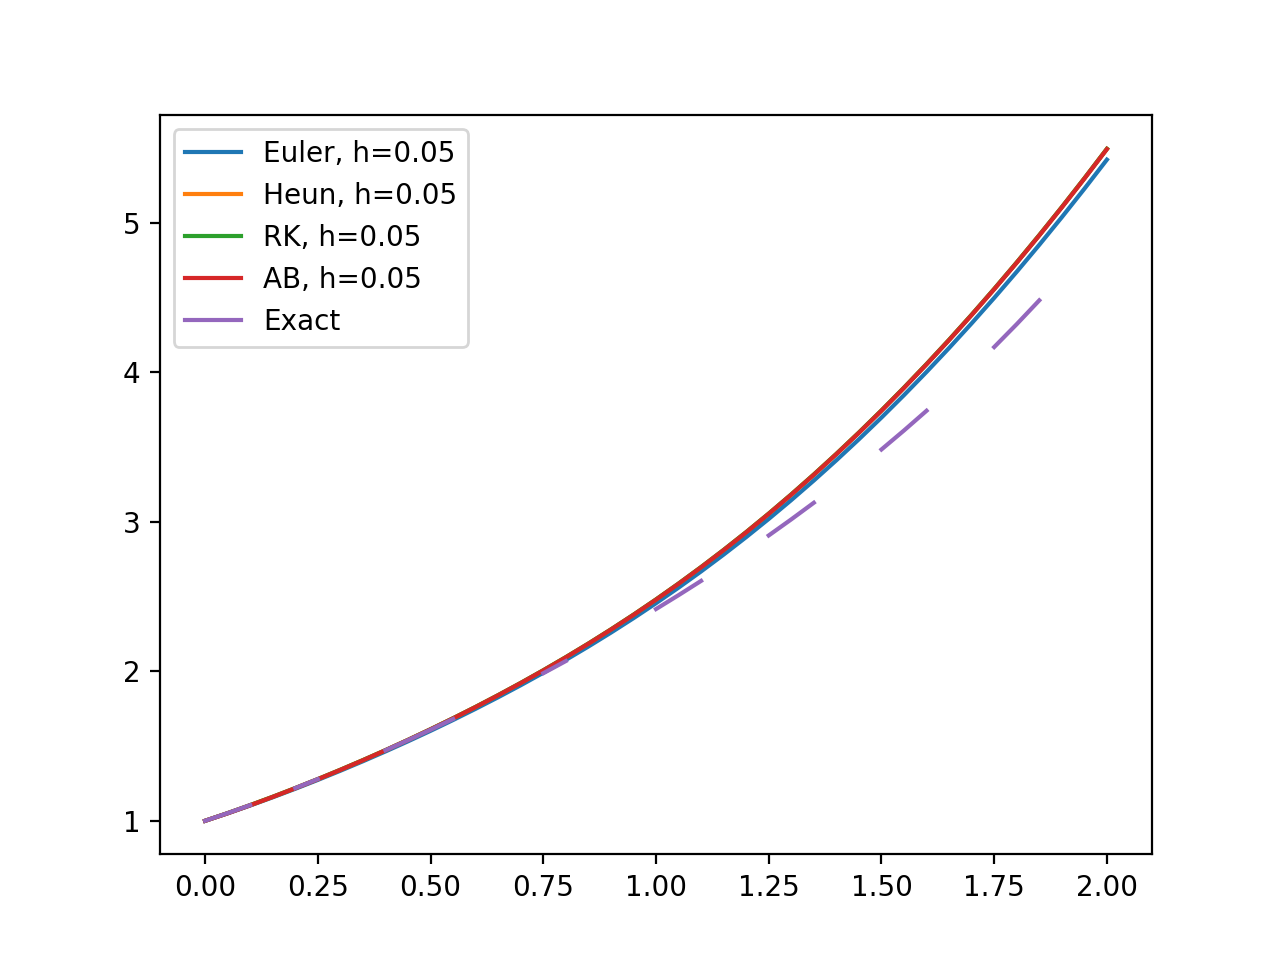

In [35]:
# Your code here for (a)

### BEGIN SOLUTION
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

# Define the equation
t = sym.symbols('t')
y = sym.Function('y')
eq4a = sym.Eq(y(t).diff(t), 2*t+sym.exp(-t*y(t)))
print("The equation")
display_latex(eq4a)

# Solve the equation
eq4asol = sym.dsolve(eq4a, y(t), ics={y(0):1}, hint = 'best')
print("has solutions")
display_latex(eq4asol)

# define the equation as a function
def eq4a_dy_dt(y, t):
    return 2*t+np.exp(-t*y)

def eq4a_exact(t):
    return 1+t+(t**2)/2-(t**3)/6+(t**4)/12 # This is the degree 4 approximation, not quite exact!

# create dataframe (table)
df_eq4a = produce_df(Euler_step, eq4a_dy_dt, 0, 2, 0.05, 1)
df_eq4a.columns = ["Euler, h=0.05"]
df_eq4a["Heun, h=0.05"] = produce_df(Heun_step, eq4a_dy_dt, 0, 2, 0.05, 1)
df_eq4a["RK, h=0.05"] = produce_df(RK4_step, eq4a_dy_dt, 0, 2, 0.05, 1)
df_eq4a["AB, h=0.05"] = produce_df(AB2_step, eq4a_dy_dt, 0, 2, 0.05, 1)
df_eq4a["Exact"] = DataFrame(data = [eq4a_exact(t) for t in timesteps(0,2,0.05)],
                            index = np.round(timesteps(0,2,0.05),3))
display(df_eq4a.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4], axis=0))

# plot solutions
df_eq4a.plot()

### END SOLUTION

In [ ]:
# Autograder Test

assert df_eq4a.shape[0] == 41
print("Success: Your table has the correct number of rows.")
assert list(df_eq4a.columns) == ['Euler, h=0.05', 'Heun, h=0.05', 'RK, h=0.05', 'AB, h=0.05', 'Exact']
print("Success: Your table has the correct columns.")

assert df_eq4a.filter(items=[0.2], axis=0).iloc[0]["Heun, h=0.05"] == 1.218823869462594
print("Success: A spot check of one entry was correct.")

### BEGIN HIDDEN TESTS
### END HIDDEN TESTS

The equation


has solutions


,"Euler, h=0.05","Heun, h=0.05","RK, h=0.05","AB, h=0.05"
0.0,-1.000000,-1.000000,-1.000000,-1.000000
0.1,-0.920498,-0.924650,-0.924517,-0.922820
0.2,-0.857538,-0.864338,-0.864125,-0.862962
0.4,-0.770038,-0.780008,-0.779706,-0.779105


<IPython.core.display.Javascript object>


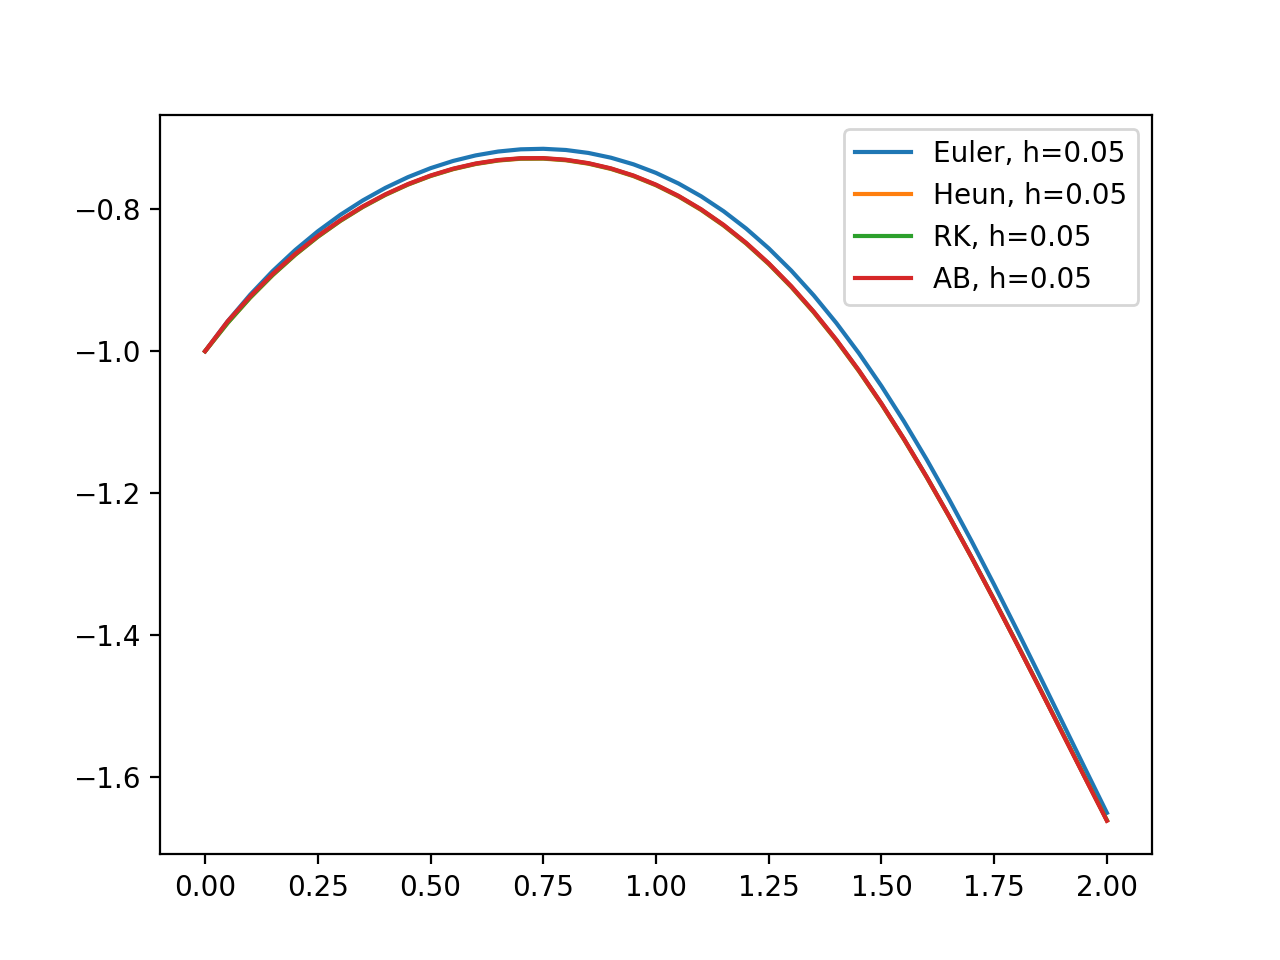

In [36]:
# Your code here for (b)

### BEGIN SOLUTION
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

# Define the equation
t = sym.symbols('t')
y = sym.Function('y')
eq4b = sym.Eq(y(t).diff(t), (t**2-y(t)**2)*sym.sin(y(t)))
print("The equation")
display_latex(eq4b)

# Solve the equation
eq4bsol = sym.dsolve(eq4b, y(t), ics={y(0):-1},hint = 'best')
print("has solutions")
display_latex(eq4bsol)

# define the equation as a function
def eq4b_dy_dt(y, t):
    return (t**2-y**2)*np.sin(y)

# create dataframe (table)
df_eq4b = produce_df(Euler_step, eq4b_dy_dt, 0, 2, 0.05, -1)
df_eq4b.columns = ["Euler, h=0.05"]
df_eq4b["Heun, h=0.05"] = produce_df(Heun_step, eq4b_dy_dt, 0, 2, 0.05, -1)
df_eq4b["RK, h=0.05"] = produce_df(RK4_step, eq4b_dy_dt, 0, 2, 0.05, -1)
df_eq4b["AB, h=0.05"] = produce_df(AB2_step, eq4b_dy_dt, 0, 2, 0.05, -1)
display(df_eq4b.filter(items=[0.0, 0.1, 0.2, 0.3, 0.4], axis=0))

# plot solutions
df_eq4b.plot()
### END SOLUTION

In [ ]:
# Autograder Test

assert df_eq4b.shape[0] == 41
print("Success: Your table has the correct number of rows.")
assert set(['Euler, h=0.05', 'Heun, h=0.05', 'RK, h=0.05', 'AB, h=0.05']).issubset(list(df_eq4b.columns))
print("Success: Your table has the correct columns.")


assert df_eq4b.filter(items=[0.4], axis=0).iloc[0]["RK, h=0.05"] == -0.7797059657098393
print("Success: A spot check of one entry was correct.")

### BEGIN HIDDEN TESTS
### END HIDDEN TESTS

<div class="alert alert-info">
    <h3>Exercise 4.2</h3>

Solve Problem 4 in section 8.5 of Boyce & DiPrima (p376):

$$ x'=\exp(-x+y)-\cos x, \quad y'=\sin(x-3y); \quad x(0)=1, y(0)=2 $$

finding the approximate solutions at $t=0.2, 0.4, 0.6, 0.8, 1.0$ using:

**(a)** the Euler method with $h=0.1$

**(b)** Runge-Kutta with $h=0.2$

**(c)** Runge-Kutta with $h=0.1$

</div>

*Hint*: we suggest you store the DataFrames in variables called `df_6A`, `df_6B`, and `df_6C` respectively.

In [ ]:
# Your code for (a)

### BEGIN SOLUTION

def sys6_dy_dt(y, t):
    return np.array([np.exp(-y[0]+y[1])-np.cos(y[0]), np.sin(y[0]-3*y[1])])

df_sys6_Euler = Euler_step(sys6_dy_dt, 0, 2, 0.1, [1,2])
df_a = DataFrame(data = df_sys6_Euler[0], index = np.round(df_sys6_Euler[1],3), columns=['x', 'y'])
df_6A = df_a.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)
display(df_6A)

### END SOLUTION

In [ ]:
# Autograder test

assert list(df_6A.index.values) == [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
print("Success: Your table has the correct rows.")
assert list(df_6A.columns) == ['x', 'y']
print("Success: Your table has the correct columns.")

### BEGIN HIDDEN TESTS

# check student's dataframe matches the correct table values in the textbook
df_sys6_Euler_soln = Euler_step(sys6_dy_dt, 0, 2, 0.1, [1,2])
df_a_soln = DataFrame(data = df_sys6_Euler_soln[0], index = np.round(df_sys6_Euler_soln[1],3), columns=['x', 'y'])
df_6A_soln = df_a_soln.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)

from pandas import testing
testing.assert_frame_equal(df_6A_soln, df_6A)
print("Success: Your solution agrees with the model answer!")

### END HIDDEN TESTS

In [ ]:
# Your code for (b)

### BEGIN SOLUTION

df_sys6_RK02 = RK4_step(sys6_dy_dt, 0, 2, 0.2, [1,2])
df_b = DataFrame(data = df_sys6_RK02[0], index = np.round(df_sys6_RK02[1],3), columns=['x', 'y'])
df_6B = df_b.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)
display(df_6B)

### END SOLUTION

In [ ]:
# Autograder test

assert list(df_6B.index.values) == [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
print("Success: Your table has the correct rows.")
assert list(df_6B.columns) == ['x', 'y']
print("Success: Your table has the correct columns.")

### BEGIN HIDDEN TESTS

# check student's dataframe matches the correct table values in the textbook
df_sys6_RK02_soln = RK4_step(sys6_dy_dt, 0, 2, 0.2, [1,2])
df_b_soln = DataFrame(data = df_sys6_RK02_soln[0], index = np.round(df_sys6_RK02_soln[1],3), columns=['x', 'y'])
df_6B_soln = df_b_soln.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)

from pandas import testing
testing.assert_frame_equal(df_6B_soln, df_6B)
print("Success: Your solution agrees with the model answer!")

### END HIDDEN TESTS

In [ ]:
# Your code for (c)

### BEGIN SOLUTION

df_sys6_RK01 = RK4_step(sys6_dy_dt, 0, 2, 0.1, [1,2])
df_c = DataFrame(data = df_sys6_RK01[0], index = np.round(df_sys6_RK01[1],3), columns=['x', 'y'])
df_6C = df_c.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)
display(df_6C)

### END SOLUTION

In [ ]:
# Autograder test

assert list(df_6C.index.values) == [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
print("Success: Your table has the correct rows.")
assert list(df_6C.columns) == ['x', 'y']
print("Success: Your table has the correct columns.")

### BEGIN HIDDEN TESTS

# check student's dataframe matches the correct table values in the textbook
df_sys6_RK01_soln = RK4_step(sys6_dy_dt, 0, 2, 0.1, [1,2])
df_c_soln = DataFrame(data = df_sys6_RK01_soln[0], index = np.round(df_sys6_RK01_soln[1],3), columns=['x', 'y'])
df_6C_soln = df_c_soln.filter(items=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], axis=0)

from pandas import testing
testing.assert_frame_equal(df_6C_soln, df_6C)
print("Success: Your solution agrees with the model answer!")

### END HIDDEN TESTS